# Memory Pressure Notebook

# Introduction

This notebook aims to evaluate the results within a memory constrained context for the memory consumption experiment.
The goals of this notebooks are:

- Run experiments with memory constraints to validate `M_peak` accuracy.
- Ensure that measured peak memory usage reflects the actual minimum required memory.

## How to Use this Notebook

- Run the individual cells to inspect and verify the behavior of specific parts of the component.
- Review the expected behavior before running the full experiment via the shell script.
- Use this notebook as a debugging and documentation tool to support future iterations of the experiment.

By structuring the experiment this way, we ensure a clear separation between explanation, validation, and execution, making it easier to reason about the results while keeping the experiment reproducible and well-documented.

## Components Overview

Before running the component, we need to setup a few variables and utils.

In [1]:
import os
import sys
from datetime import datetime

from loguru import logger

dirs_to_add = [
    os.path.abspath('../'),
    os.path.abspath('../../../libs/traceq'),
]

for dir_to_add in dirs_to_add:
    if dir_to_add not in sys.path:
        sys.path.insert(0, dir_to_add)

TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

EXPERIMENT_IMAGE = "mac/04-memory-pressure"
RELATIVE_OUT_DIR = f"out/04-memory-pressure-{TIMESTAMP}"
CONTAINER_OUT_DIR = f"/app/{RELATIVE_OUT_DIR}"

INLINES = "700"
XLINES = "700"
SAMPLES = "400"

logger.debug("Generated global variables")
logger.debug(f"TIMESTAMP: {TIMESTAMP}")
logger.debug(f"EXPERIMENT_IMAGE: {EXPERIMENT_IMAGE}")
logger.debug(f"RELATIVE_OUT_DIR: {RELATIVE_OUT_DIR}")
logger.debug(f"CONTAINER_OUT_DIR: {CONTAINER_OUT_DIR}")

logger.debug(f"INLINES: {INLINES}")
logger.debug(f"XLINES: {XLINES}")
logger.debug(f"SAMPLES: {SAMPLES}")

os.makedirs(f"../{RELATIVE_OUT_DIR}/docker-monitor", exist_ok=True)

2025-03-05 00:22:13.989 | DEBUG    | __main__:<module>:26 - Generated global variables
2025-03-05 00:22:13.989 | DEBUG    | __main__:<module>:27 - TIMESTAMP: 20250305002213
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:28 - EXPERIMENT_IMAGE: mac/04-memory-pressure
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:29 - RELATIVE_OUT_DIR: out/04-memory-pressure-20250305002213
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:30 - CONTAINER_OUT_DIR: /app/out/04-memory-pressure-20250305002213
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:32 - INLINES: 700
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:33 - XLINES: 700
2025-03-05 00:22:13.990 | DEBUG    | __main__:<module>:34 - SAMPLES: 400


In [2]:
import importlib
import tools.docker

importlib.reload(tools.docker)

vfs_client, vfs_container = tools.docker.get_vfs_client(f"../{RELATIVE_OUT_DIR}")

2025-03-05 00:22:16.893 | INFO     | tools.docker:get_vfs_client:68 - Start dind dockerd...
ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64658->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:16.969 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64674->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:19.054 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64683->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:21.127 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64691->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:23.213 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64696->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:25.309 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64705->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:27.386 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64710->[::1]:2375: read: connection reset by peer
errors pretty printing info
2025-03-05 00:22:29.468 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:64719->[::1]:2375: read: connection reset by peer
2025-03-05 00:22:31.542 | INFO     | tools.docker:__wait_for_dockerd:141 - Waiting for dockerd to start...
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

[DEPRECATION NOTICE]: API is accessible on http://0.0.0.0:2375 without encryption.
         Access to the remote API is equivalent to root access on the host. Refer
         to the 'Docker daemon attack surface' section in the documentation for
         more information: https://docs.docker.com/go/attack-surface/
In future versions this will be a hard failure preventing the daemon from starting! Learn more at: https://docs.docker.com/go/api-security/
2025-03-05 00:22:33.627 | INFO     | tools.docker:__wait_for_dockerd:138 - Dockerd inside dind is fully operational.


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

Let's start by building the Docker image within the VFS client

In [3]:
from loguru import logger

logger.info("Building experiment image...")
experiment_image = tools.docker.build_image(EXPERIMENT_IMAGE, vfs_client)
logger.info("Experiment image built successfully.")

2025-03-05 00:22:33.651 | INFO     | __main__:<module>:3 - Building experiment image...
2025-03-05 00:22:33.651 | INFO     | tools.docker:build_image:21 - Building TraceQ image...
2025-03-05 00:24:38.500 | INFO     | tools.docker:build_image:27 - TraceQ image built.
2025-03-05 00:24:38.501 | INFO     | tools.docker:build_image:29 - Building experiment image...
2025-03-05 00:25:57.678 | INFO     | tools.docker:build_image:37 - Experiment image built.
2025-03-05 00:25:57.680 | INFO     | __main__:<module>:5 - Experiment image built successfully.


With the image built, we're going to generate the test data.

In [4]:
memory_usage_log_file = f"docker-monitor/memory-usage--data-generation.log"
page_faults_log_file = f"docker-monitor/page-faults--data-generation.log"

logger.info("Generating test data...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "generate-data",
        "--inlines", INLINES,
        "--xlines", XLINES,
        "--samples", SAMPLES,
        "--output-dir", f"{CONTAINER_OUT_DIR}/data"
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py generate-data",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished generating test data")

2025-03-05 00:25:57.695 | INFO     | __main__:<module>:4 - Generating test data...
2025-03-05 00:25:58.550 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:25:58.551 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:27:14.534 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:27:14.535 | INFO     | __main__:<module>:27 - Finished generating test data


We'll start by running the operator without memory constraints to check the memory usage.

In [5]:
memory_usage_log_file = f"docker-monitor/memory-usage--0-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--0-pct-pressure.log"

tools.docker.drop_caches_in_container()

logger.info("Launching experiment...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-0-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-05 00:27:14.949 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:27:14.951 | INFO     | __main__:<module>:6 - Launching experiment...
2025-03-05 00:27:15.313 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:27:15.315 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:27:23.965 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:27:23.965 | INFO     | __main__:<module>:30 - Finished executing experiment


In [6]:
from traceq import load_profile
import tools.conversions

importlib.reload(tools.conversions)

psutil_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-0-pct-pressure.prof")
psutil_peak_memory_usage = tools.conversions.b_to_mb(
    max(entry["psutil_memory_usage"] for entry in psutil_profile["data"]))

logger.info(f"Tracer captured {len(psutil_profile["data"])} traces")
logger.info(f"Peak memory usage from psutil profile: {tools.conversions.mb_to_gb(psutil_peak_memory_usage)} GB")

2025-03-05 00:27:24.180 | INFO     | __main__:<module>:10 - Tracer captured 251 traces
2025-03-05 00:27:24.180 | INFO     | __main__:<module>:11 - Peak memory usage from psutil profile: 5329.40234375 MB


Now, we're going to run the operator with memory constraints to check the memory usage.
The idea is to execute with less memory than the peak memory usage to check if the operator breaks.

In [17]:
memory_usage_log_file = f"docker-monitor/memory-usage--1-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--1-pct-pressure.log"

psutil_peak_memory_usage_99_pct = int(float(psutil_peak_memory_usage) * 0.99)
logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(psutil_peak_memory_usage_99_pct)} GB")

tools.docker.build_image(EXPERIMENT_IMAGE, vfs_client)

logger.info("Launching experiment...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-1-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
        "MEMORY_LIMIT_MB": psutil_peak_memory_usage_99_pct,
        "MEMORY_PRESSURE_LOG_FILE": f"{CONTAINER_OUT_DIR}/docker-monitor/memory-pressure.log",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-05 00:39:56.692 | INFO     | __main__:<module>:5 - Memory limit will be 5.15234375 GB
2025-03-05 00:39:56.693 | INFO     | tools.docker:build_image:21 - Building TraceQ image...
2025-03-05 00:40:04.459 | INFO     | tools.docker:build_image:27 - TraceQ image built.
2025-03-05 00:40:04.460 | INFO     | tools.docker:build_image:29 - Building experiment image...
2025-03-05 00:40:30.041 | INFO     | tools.docker:build_image:37 - Experiment image built.
2025-03-05 00:40:30.042 | INFO     | __main__:<module>:9 - Launching experiment...
2025-03-05 00:40:30.757 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:40:30.759 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:40:44.025 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:40:44.026 | INFO     | __main__:<module>:35 - Finished executing experiment


In [18]:
import tools.monitor

importlib.reload(tools.monitor)
importlib.reload(tools.conversions)

docker_monitor_1_pct_pressure_mu_df = tools.monitor.memory_usage_log_to_df(
    f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-usage--1-pct-pressure.log",
)

psutil_1_pct_pressure_profile = load_profile(
    f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-1-pct-pressure.prof")
psutil_1_pct_pressure_peak_memory_usage = tools.conversions.b_to_gb(
    max(entry["psutil_memory_usage"] for entry in psutil_1_pct_pressure_profile["data"]))

docker_monitor_1_pct_pressure_peak_memory_usage = tools.conversions.kb_to_gb(
    docker_monitor_1_pct_pressure_mu_df["memory_usage_kb"].max()
)

logger.info(f"Tracer captured {len(psutil_1_pct_pressure_profile["data"])} traces")
logger.info(f"Docker monitor captured {len(docker_monitor_1_pct_pressure_mu_df)} traces")
logger.info(f"Peak memory usage from psutil profile: {psutil_1_pct_pressure_peak_memory_usage} GB")
logger.info("Peak memory usage from Docker monitor: {} GB".format(docker_monitor_1_pct_pressure_peak_memory_usage))
logger.info(f"Docker limit memory usage: {tools.conversions.mb_to_gb(psutil_peak_memory_usage_99_pct)} GB")

2025-03-05 00:41:12.930 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--1-pct-pressure.log
2025-03-05 00:41:12.933 | INFO     | __main__:<module>:19 - Tracer captured 492 traces
2025-03-05 00:41:12.933 | INFO     | __main__:<module>:20 - Docker monitor captured 723 traces
2025-03-05 00:41:12.933 | INFO     | __main__:<module>:21 - Peak memory usage from psutil profile: 5.095554351806641 GB
2025-03-05 00:41:12.934 | INFO     | __main__:<module>:22 - Peak memory usage from Docker monitor: 5.152317047119141 GB
2025-03-05 00:41:12.934 | INFO     | __main__:<module>:23 - Docker limit memory usage: 5.15234375 GB


As we can see, even with a 1% memory constraint, the operator was able to execute successfully.
For some reason, the profiler reports a memory usage higher than the limit set by Docker.
Let's try with a stricter constraint.

In [19]:
memory_usage_log_file = f"docker-monitor/memory-usage--5-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--5-pct-pressure.log"

psutil_peak_memory_usage_95_pct = int(float(psutil_peak_memory_usage) * 0.95)
logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(psutil_peak_memory_usage_95_pct)} GB")

logger.info("Launching experiment...")
tools.docker.run_isolated_container(
    client=vfs_client,
    image_name=EXPERIMENT_IMAGE,
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-5-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
        "MEMORY_LIMIT_MB": psutil_peak_memory_usage_95_pct,
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-05 00:41:12.951 | INFO     | __main__:<module>:5 - Memory limit will be 4.943359375 GB
2025-03-05 00:41:12.951 | INFO     | __main__:<module>:7 - Launching experiment...
2025-03-05 00:41:13.333 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:41:13.335 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:41:25.632 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:41:25.634 | INFO     | __main__:<module>:32 - Finished executing experiment


As we can see, even with 5% memory pressure the experiment still runs.
In this case we can see that the profiler reports a memory usage close to the limit set by Docker, which is expected.
Now, let's try increasing the pressure until it breaks.

In [20]:
# Remove the log files of the pressure experiment so far
profiler_dir_path = f"../{RELATIVE_OUT_DIR}/profiler"
docker_monitor_dir_path = f"../{RELATIVE_OUT_DIR}/docker-monitor"

profile_files = os.listdir(profiler_dir_path)
docker_monitor_files = os.listdir(docker_monitor_dir_path)

for file in profile_files:
    if "pct-pressure" in file:
        os.remove(f"{profiler_dir_path}/{file}")

for file in docker_monitor_files:
    if "pct-pressure" in file:
        os.remove(f"{docker_monitor_dir_path}/{file}")


In [21]:
def list_profiles(prefix: str):
    profiler_dir_path = f"../{RELATIVE_OUT_DIR}/profiler"
    profile_files = os.listdir(profiler_dir_path)
    return [file for file in profile_files if prefix in file]


def get_avg_memory_usage(prefix: str):
    profiles = list_profiles(prefix)
    peak_memory_usages = []

    for profile in profiles:
        psutil_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{profile}")
        peak_memory_usages.append(
            tools.conversions.b_to_gb(
                max(entry["psutil_memory_usage"] for entry in psutil_profile["data"])
            )
        )

    return sum(peak_memory_usages) / len(peak_memory_usages)


def experiment(pressure_pct: int, peak_memory_usage: str = psutil_peak_memory_usage, iterations: int = 5):
    logger.info(f"Running experiment with {pressure_pct}% pressure")

    logger.info(
        f"Recorded peak memory usage without memory pressure was: {tools.conversions.mb_to_gb(peak_memory_usage)} GB")

    profile_prefix = f"{INLINES}-{XLINES}-{SAMPLES}-{pressure_pct}-pct-pressure"

    for i in range(iterations):
        logger.info(f"Running iteration {i + 1}...")

        memory_usage_log_file = f"docker-monitor/memory-usage--{pressure_pct}-pct-pressure-{i}.log"
        page_faults_log_file = f"docker-monitor/page-faults--{pressure_pct}-pct-pressure-{i}.log"
        memory_pressure_log_file = f"docker-monitor/memory-pressure--{pressure_pct}-pct-pressure-{i}.log"

        mem_limit = int(float(peak_memory_usage) * ((100 - pressure_pct) / 100))

        logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(mem_limit)} GB")

        logger.info("Launching experiment...")
        result = tools.docker.run_isolated_container(
            client=vfs_client,
            image_name=EXPERIMENT_IMAGE,
            command=[
                "operate",
                "envelope",
                "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
                "--memory-profiler", "psutil",
                "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
                "--memory-profile-session-id", f"{profile_prefix}-{i}",
            ],
            environment={
                "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
                "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
                "MEMORY_PRESSURE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_pressure_log_file}",
                "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
                "MEMORY_LIMIT_MB": mem_limit,
            },
            volumes={
                "/mnt/out": {
                    "bind": CONTAINER_OUT_DIR,
                    "mode": "rw",
                }
            },
        )
        status_code = result["StatusCode"]

        try:
            logger.info(f"Container exited with code: {status_code}")
            logger.info("Finished executing experiment")

            docker_monitor_mu_df = tools.monitor.memory_usage_log_to_df(
                f"../{RELATIVE_OUT_DIR}/{memory_usage_log_file}",
            )

            psutil_profile = load_profile(
                f"../{RELATIVE_OUT_DIR}/profiler/{profile_prefix}-{i}.prof")
            psutil_peak_memory_usage = tools.conversions.b_to_gb(
                max(entry["psutil_memory_usage"] for entry in psutil_profile["data"]))

            docker_monitor_peak_memory_usage = tools.conversions.kb_to_gb(
                docker_monitor_mu_df["memory_usage_kb"].max()
            )

            logger.info(f"Tracer captured {len(psutil_profile["data"])} traces")
            logger.info(f"Docker monitor captured {len(docker_monitor_mu_df)} traces")
            logger.info(f"Peak memory usage from psutil profile: {psutil_peak_memory_usage} GB")
            logger.info("Peak memory usage from Docker monitor: {} GB".format(docker_monitor_peak_memory_usage))
            logger.info(f"Docker limit memory usage: {tools.conversions.mb_to_gb(mem_limit)} GB")
        except Exception as _:
            pass

        yield status_code

    avg_memory_usage = get_avg_memory_usage(profile_prefix)
    logger.info(f"Average memory usage for {pressure_pct}% pressure: {avg_memory_usage} GB")

In [22]:
pressure_pct = 0
pressure_step = 1

while True:
    try:
        for status_code in experiment(pressure_pct=pressure_pct):
            logger.info(f"Experiment exited with code: {status_code}")
            if status_code != 0:
                raise Exception(f"Experiment failed with {pressure_pct}% pressure")
    except Exception as e:
        logger.error(f"Experiment threw an exception with {pressure_pct}% pressure")
        logger.error(e)
        break

    pressure_pct += pressure_step

2025-03-05 00:41:25.685 | INFO     | __main__:experiment:23 - Running experiment with 0% pressure
2025-03-05 00:41:25.685 | INFO     | __main__:experiment:25 - Recorded peak memory usage without memory pressure was: 5.204494476318359 GB
2025-03-05 00:41:25.685 | INFO     | __main__:experiment:31 - Running iteration 1...
2025-03-05 00:41:25.686 | INFO     | __main__:experiment:39 - Memory limit will be 5.2041015625 GB
2025-03-05 00:41:25.686 | INFO     | __main__:experiment:41 - Launching experiment...
2025-03-05 00:41:26.054 | INFO     | tools.docker:drop_caches_in_container:131 - Dropped caches inside docker:dind container
2025-03-05 00:41:26.057 | INFO     | tools.docker:run_isolated_container:97 - Launching in isolated container...
2025-03-05 00:41:37.384 | INFO     | tools.docker:run_isolated_container:111 - Finished running in isolated container
2025-03-05 00:41:37.385 | INFO     | __main__:experiment:70 - Container exited with code: 0
2025-03-05 00:41:37.385 | INFO     | __main__

KeyboardInterrupt: 

As we can see, the experiment was able to run even with a large amount of memory pressure.
It only breaks after 90% pressure.
Let's now evaluate the results.

In [23]:
# Removes the log files for the pressure that failed
docker_monitor_dir_path = f"../{RELATIVE_OUT_DIR}/docker-monitor"
docker_monitor_files = os.listdir(docker_monitor_dir_path)

for file in profile_files:
    if f"{pressure_pct}-pct-pressure" in file:
        os.remove(f"{profiler_dir_path}/{file}")

In [24]:
importlib.reload(tools.monitor)

filtered_profile_files = list_profiles("pressure")
captured_profile_names = [(file.split("-")[3], file.split("-")[6].split('.')[0]) for file in filtered_profile_files]
sorted_captured_profile_names = sorted(captured_profile_names, key=lambda x: (int(x[0]), int(x[1])))

docker_monitor_mu_dfs = [
    tools.monitor.memory_usage_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-usage--{pressure}-pct-pressure-{iteration}.log",
    ) for pressure, iteration in sorted_captured_profile_names
]

docker_monitor_pf_dfs = [
    tools.monitor.page_faults_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/page-faults--{pressure}-pct-pressure-{iteration}.log",
    ) for pressure, iteration in sorted_captured_profile_names
]

docker_monitor_pressure_dfs = [
    tools.monitor.memory_pressure_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-pressure--{pressure}-pct-pressure-{iteration}.log",
    ) for pressure, iteration in sorted_captured_profile_names
]

memory_usage_profiles = [
    load_profile(
        f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-{pressure}-pct-pressure-{iteration}.prof")
    for pressure, iteration in sorted_captured_profile_names
]

profiles = list(
    zip(
        sorted_captured_profile_names,
        docker_monitor_mu_dfs,
        docker_monitor_pf_dfs,
        docker_monitor_pressure_dfs,
        memory_usage_profiles,
    ),
)

2025-03-05 00:54:45.537 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--0-pct-pressure-0.log
2025-03-05 00:54:45.538 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--0-pct-pressure-1.log
2025-03-05 00:54:45.540 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--0-pct-pressure-2.log
2025-03-05 00:54:45.541 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--0-pct-pressure-3.log
2025-03-05 00:54:45.542 | INFO     | tools.monitor:memory_usage_log_to_df:12 - Reading memory usage log) file: ../out/04-memory-pressure-20250305002213/docker-monitor/memory-usage--0-pct-press

In [25]:
profiles[0][0]

('0', '0')

In [26]:
profiles[0][1]

,timestamp,memory_usage_kb
0,2025-03-05 03:41:29.232,28368
1,2025-03-05 03:41:29.249,29268
2,2025-03-05 03:41:29.262,37368
3,2025-03-05 03:41:29.273,36892
4,2025-03-05 03:41:29.285,35364
...,...,...
618,2025-03-05 03:41:37.145,96136
619,2025-03-05 03:41:37.160,35576
620,2025-03-05 03:41:37.172,17012
621,2025-03-05 03:41:37.184,15852


In [27]:
profiles[0][2]

,timestamp,minor_page_faults,major_page_faults
0,2025-03-05 03:41:29.445,4427,0
1,2025-03-05 03:41:29.463,4605,0
2,2025-03-05 03:41:29.476,4620,0
3,2025-03-05 03:41:29.489,4772,0
4,2025-03-05 03:41:29.504,6600,0
...,...,...,...
540,2025-03-05 03:41:37.106,50926,14498
541,2025-03-05 03:41:37.118,52189,14538
542,2025-03-05 03:41:37.130,52737,14597
543,2025-03-05 03:41:37.144,53117,14690


In [28]:
profiles[0][3]

,timestamp,some10,some60,some300,full10,full60,full300,oom_kills,oom_failures
0,2025-03-05 03:41:29.245,0.00,0.00,0.00,0.00,0.00,0.00,0,0
1,2025-03-05 03:41:29.267,0.00,0.00,0.00,0.00,0.00,0.00,0,0
2,2025-03-05 03:41:29.292,0.00,0.00,0.00,0.00,0.00,0.00,0,0
3,2025-03-05 03:41:29.310,0.00,0.00,0.00,0.00,0.00,0.00,0,0
4,2025-03-05 03:41:29.329,0.00,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
369,2025-03-05 03:41:37.115,13.49,2.66,0.56,8.88,1.73,0.36,0,0
370,2025-03-05 03:41:37.135,13.49,2.66,0.56,8.88,1.73,0.36,0,0
371,2025-03-05 03:41:37.153,13.49,2.66,0.56,8.88,1.73,0.36,0,0
372,2025-03-05 03:41:37.171,13.49,2.66,0.56,8.88,1.73,0.36,0,0


In [29]:
profiles[0][4]

{'metadata': {'entrypoint_data': '[[[-0.00126108 -0.00126108 -0.00126108 ... -0.00126108 -0.00126108\n   -0.00126108]\n  [ 0.31191593  0.31191593  0.31191593 ...  0.31191593  0.31191593\n    0.31191593]\n  [ 0.5336874   0.5336874   0.5336874  ...  0.5336874   0.5336874\n    0.5336874 ]\n  ...\n  [-0.9720294  -0.9720294  -0.9720294  ... -0.9720294  -0.9720294\n   -0.9720294 ]\n  [-1.0802546  -1.0802546  -1.0802546  ... -1.0802546  -1.0802546\n   -1.0802546 ]\n  [-0.89051896 -0.89051896 -0.89051896 ... -0.89051896 -0.89051896\n   -0.89051896]]\n\n [[-0.00126108 -0.00126108 -0.00126108 ... -0.00126108 -0.00126108\n   -0.00126108]\n  [ 0.31191593  0.31191593  0.31191593 ...  0.31191593  0.31191593\n    0.31191593]\n  [ 0.5336874   0.5336874   0.5336874  ...  0.5336874   0.5336874\n    0.5336874 ]\n  ...\n  [-0.9720294  -0.9720294  -0.9720294  ... -0.9720294  -0.9720294\n   -0.9720294 ]\n  [-1.0802546  -1.0802546  -1.0802546  ... -1.0802546  -1.0802546\n   -1.0802546 ]\n  [-0.89051896 -0.89

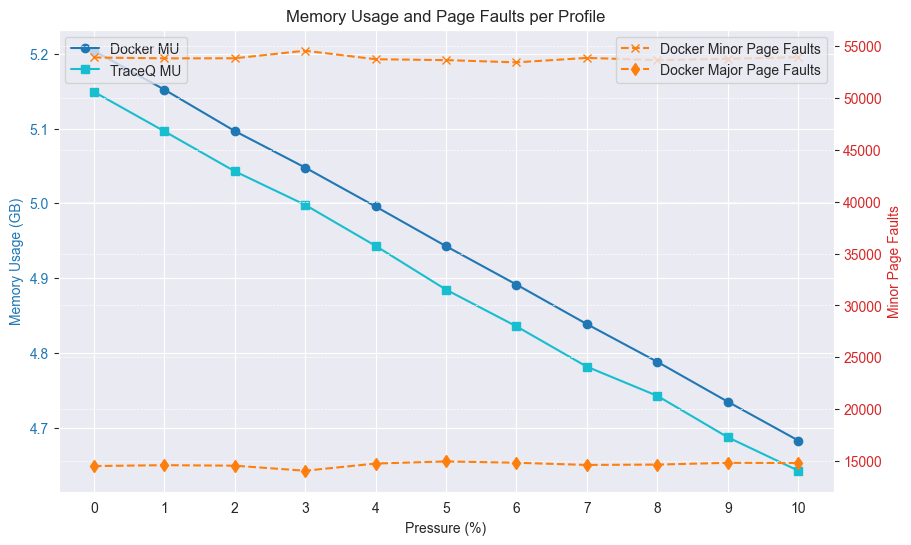

In [74]:
import matplotlib.pyplot as plt

labels = []
peaks = {}

for (pct_pressure, _), docker_mu_df, docker_pf_df, docker_mp_df, traceq_profile in profiles:
    peak_docker_mu = tools.conversions.kb_to_gb(docker_mu_df["memory_usage_kb"].max())
    peak_docker_minor_pf = docker_pf_df["minor_page_faults"].max()
    peak_docker_major_pf = docker_pf_df["major_page_faults"].max()
    peak_docker_mp_some10 = docker_mp_df["some10"].max()
    peak_docker_mp_full10 = docker_mp_df["full10"].max()
    peak_traceq_mu = tools.conversions.b_to_gb(
        max(entry["psutil_memory_usage"] for entry in traceq_profile["data"])
    )
    timestamps = [entry["unix_timestamp"] for entry in traceq_profile["data"]]
    execution_time = (max(timestamps) - min(timestamps)) / 1000  # Compute execution time in seconds

    peak_record = peaks.get(pct_pressure)
    if not peak_record:
        peak_record = {
            'docker_mus': [],
            'docker_minor_pfs': [],
            'docker_major_pfs': [],
            'docker_mps_some10': [],
            'docker_mps_full10': [],
            'traceq_mus': [],
            'traceq_et': [],
        }

    peak_record["docker_mus"].append(peak_docker_mu)
    peak_record["docker_minor_pfs"].append(peak_docker_minor_pf)
    peak_record["docker_major_pfs"].append(peak_docker_major_pf)
    peak_record["docker_mps_some10"].append(peak_docker_mp_some10)
    peak_record["docker_mps_full10"].append(peak_docker_mp_full10)
    peak_record["traceq_mus"].append(peak_traceq_mu)
    peak_record['traceq_et'].append(execution_time)

    peaks[pct_pressure] = peak_record

    if pct_pressure not in labels:
        labels.append(pct_pressure)

peaks_sorted = sorted([(pct, record) for pct, record in peaks.items()], key=lambda x: int(x[0]))
peak_records = [record for _, record in peaks_sorted]

average_peak_docker_mus = [sum(record['docker_mus']) / len(record['docker_mus']) for record in peak_records]
average_peak_docker_minor_pfs = [sum(record['docker_minor_pfs']) / len(record['docker_minor_pfs']) for record in
                                 peak_records]
average_peak_docker_major_pfs = [sum(record['docker_major_pfs']) / len(record['docker_major_pfs']) for record in
                                 peak_records]
average_peak_docker_mps_some10 = [sum(record['docker_mps_some10']) / len(record['docker_mps_some10']) for record in
                                  peak_records]
average_peak_docker_mps_full10 = [sum(record['docker_mps_full10']) / len(record['docker_mps_full10']) for record in
                                  peak_records]
average_peak_traceq_mus = [sum(record['traceq_mus']) / len(record['traceq_mus']) for record in peak_records]
average_traceq_et = [sum(record['traceq_et']) / len(record['traceq_et']) for record in peak_records]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Memory Usage (MU) on the left y-axis
ax1.set_xlabel("Pressure (%)")
ax1.set_ylabel("Memory Usage (GB)", color="tab:blue")
ax1.plot(labels, average_peak_docker_mus, "o-", color="tab:blue", label="Docker MU")
ax1.plot(labels, average_peak_traceq_mus, "s-", color="tab:cyan", label="TraceQ MU")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a secondary y-axis for Page Faults (PF)
ax2 = ax1.twinx()
ax2.set_ylabel("Minor Page Faults", color="tab:red")
ax2.plot(labels, average_peak_docker_minor_pfs, "x--", color="tab:orange", label="Docker Minor Page Faults")
ax2.plot(labels, average_peak_docker_major_pfs, "d--", color="tab:orange", label="Docker Major Page Faults")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Title and layout
plt.title("Memory Usage and Page Faults per Profile")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

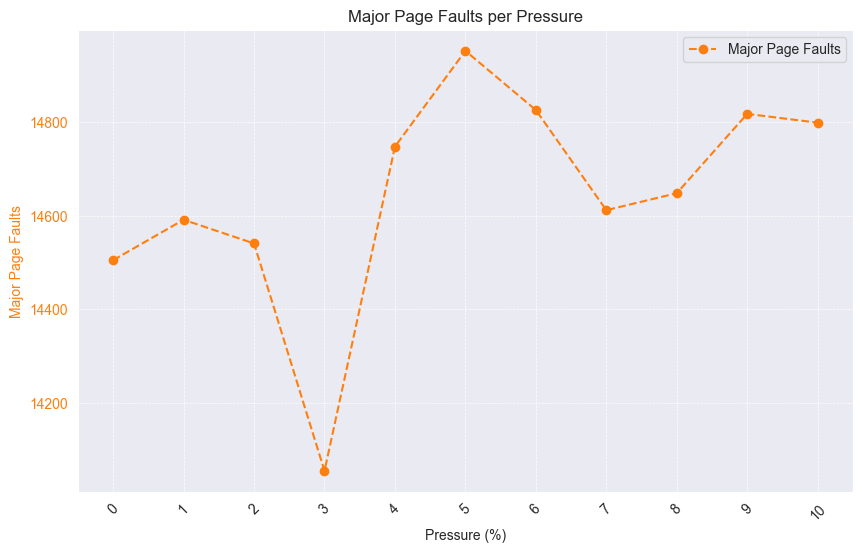

In [50]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot execution time
ax.plot(labels, average_peak_docker_major_pfs, "o--", color="tab:orange", label="Major Page Faults")
ax.set_xlabel("Pressure (%)")
ax.set_ylabel("Major Page Faults", color="tab:orange")
ax.tick_params(axis="y", labelcolor="tab:orange")
ax.set_title("")
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)

# Show the plot
plt.show()

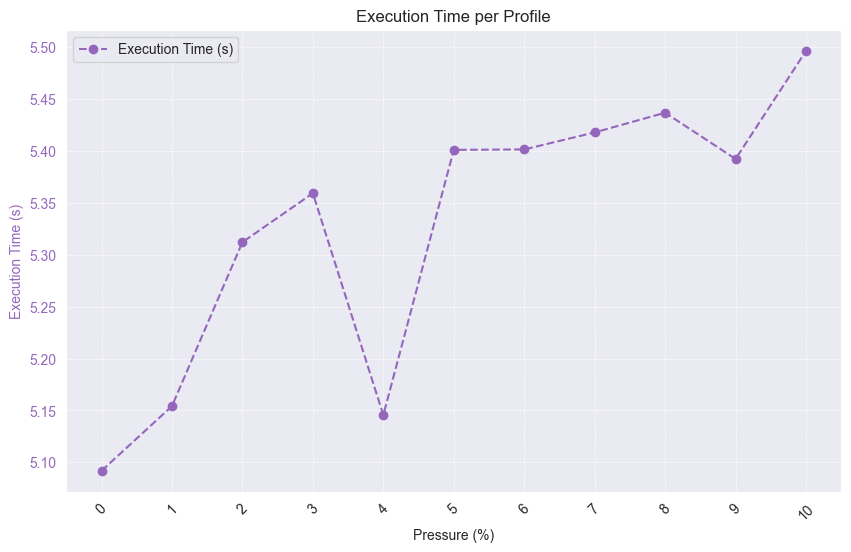

In [57]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot execution time
ax.plot(labels, average_traceq_et, "o--", color="tab:purple", label="Execution Time (s)")
ax.set_xlabel("Pressure (%)")
ax.set_ylabel("Execution Time (s)", color="tab:purple")
ax.tick_params(axis="y", labelcolor="tab:purple")
ax.set_title("Execution Time per Profile")
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)

# Show the plot
plt.show()

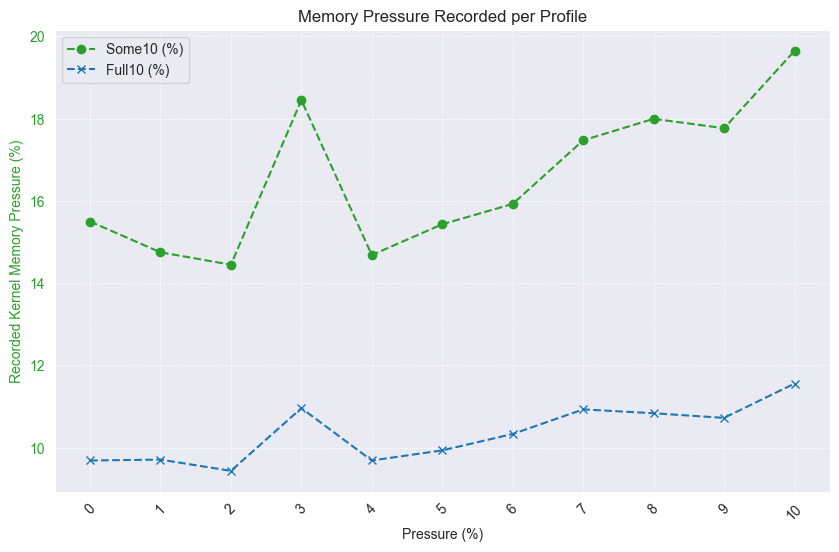

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(labels, average_peak_docker_mps_some10, "o--", color="tab:green", label="Some10 (%)")
ax.plot(labels, average_peak_docker_mps_full10, "x--", color="tab:blue", label="Full10 (%)")
ax.set_xlabel("Pressure (%)")
ax.set_ylabel("Recorded Kernel Memory Pressure (%)", color="tab:green")
ax.tick_params(axis="y", labelcolor="tab:green")
ax.set_title("Memory Pressure Recorded per Profile")
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

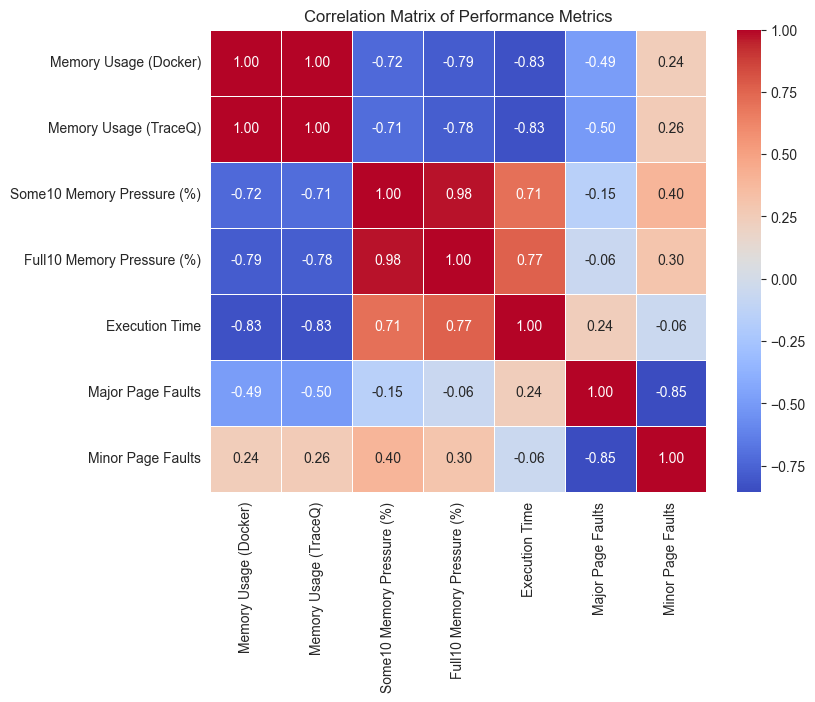

In [76]:
import pandas as pd

data = {
    "Memory Usage (Docker)": average_peak_docker_mus,
    "Memory Usage (TraceQ)": average_peak_traceq_mus,
    "Some10 Memory Pressure (%)": average_peak_docker_mps_some10,
    "Full10 Memory Pressure (%)": average_peak_docker_mps_full10,
    "Execution Time": average_traceq_et,
    "Major Page Faults": average_peak_docker_major_pfs,
    "Minor Page Faults": average_peak_docker_minor_pfs,
}
df = pd.DataFrame(data, index=labels)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Performance Metrics")
plt.show()

## Summary of Findings

### 1. Impact of Memory Pressure on Execution Time

The correlation matrix analysis, as well as the recorded execution time per profile charts, indicate a strong **positive correlation (0.71 - 0.77)** between **memory pressure** and **execution time**.
This suggests that as available memory decreases due to imposed constraints, execution time increases significantly.
The trend observed in the charts confirms this behavior, where execution time steadily increases as memory pressure intensifies, reflecting the additional overhead imposed by memory constraints, likely due to an increased rate of memory paging and context switching.

### 2. Relationship Between Memory Usage and Memory Pressure

The data analysed provided insights into the interaction between **memory usage** and **memory pressure**.
The **negative correlation (-0.72 to -0.79) between memory usage and recorded kernel memory pressure** in the correlation matrix suggests that when more memory is allocated, kernel memory pressure decreases.
This is further supported by the evaluated memory charts, where memory usage (both Docker MU and TraceQ MU) decreases as pressure increases, while recorded memory pressure rises.
This relationship highlights that constraining memory availability leads to **higher system contention** and forces processes to operate under constrained memory conditions, increasing system-wide pressure.

### 3. Behavior of Page Faults Under Memory Constraints

The relationship between **major page faults and minor page faults** is characterized by a **strong negative correlation (-0.85)** in the correlation matrix.
This indicates a shift in fault-handling behavior as memory pressure increases.
One of the charts, which tracks major page faults across varying pressure levels, suggests that **major page faults increase at higher pressure levels**, although the response is nonlinear.
A critical observation is the temporary drop in page faults at **pressure levels between 3% and 4%**, which could indicate system optimizations attempting to compensate for resource starvation.
The presence of **increased memory pressure, but fluctuating page faults** suggests that under constrained conditions, the system prioritizes certain memory regions for eviction, leading to **potential performance instability**.

### 4. Execution Efficiency Under Increasing Memory Constraints

The correlation matrix indicates a **strong negative correlation (-0.83)** between **memory usage** and **execution time**, suggesting that processes executing under higher memory availability tend to complete faster.
We can confirm this behavior based on the evaluated data, where execution time increases with greater memory pressure.
This aligns with expectations, as memory constraints force processes to rely more on virtual memory, increasing latency due to paging and slower memory access operations.
The findings demonstrate that beyond a critical threshold of memory pressure, the degradation in execution efficiency is unavoidable, which has implications for system tuning in resource-constrained environments.

### 5. Implications for System Optimization

The findings collectively emphasize the necessity of **dynamic memory allocation strategies** in memory-constrained environments.
The observed trade-offs between **memory pressure, execution time, and fault-handling mechanisms** highlight that resource allocation policies must be adapted dynamically to avoid severe performance degradation.
The non-monotonic trend in **major page faults** suggests that static allocation strategies may not be optimal, and that incorporating **adaptive memory management techniques** could help mitigate unexpected performance degradation under high-pressure conditions.

## 6. Key Takeaways
- **Higher memory pressure results in increased execution time** due to the overhead of memory contention.
- **Memory usage and pressure exhibit a strong inverse relationship**, with lower memory availability leading to heightened pressure.
- **Page faults do not scale linearly with memory pressure**, indicating the presence of system optimizations that manage memory access under constraints.
- **Execution efficiency is strongly dependent on available memory**, reinforcing the importance of optimizing memory allocation for performance-sensitive applications.

These findings provide a detailed understanding of how memory constraints influence execution dynamics, which is critical for designing **resilient, performance-efficient computing systems** in constrained environments.